# GEM on Karateclub

## Setup

In [ ]:
!git clone https://github.com/palash1992/GEM.git
%cd GEM
!mkdir gem/intermediate
!pip install .

/content/GEM


In [ ]:
%matplotlib inline

In [ ]:
!pip install keras==2.0.2

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


## Karateclub Dataset

In [ ]:
!wget -q --show-progress https://github.com/palash1992/GEM/raw/master/examples/data/karate.edgelist

karate.edgelist     100%[===================>]     405  --.-KB/s    in 0s      


Num nodes: 34, num edges: 77
[Errno 2] No such file or directory: 'gem/c_exe/gf': 'gem/c_exe/gf'
./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission
		Iter id: 0, Objective: 77.007, f1: 76.9991, f2: 0.00790408
		Iter id: 10000, Objective: 76.9945, f1: 76.991, f2: 0.00352807
		Iter id: 20000, Objective: 76.9909, f1: 76.9863, f2: 0.00451933
		Iter id: 30000, Objective: 76.989, f1: 76.9838, f2: 0.00522236
		Iter id: 40000, Objective: 76.9882, f1: 76.9826, f2: 0.0055596
graph_factor_sgd:
	Training time: 46.538126
	MAP: 0.6191474659185656 	 preccision curve: [0.0, 0.5, 0.6666666666666666, 0.5, 0.4]



----------------------------------------------------------------------------------------------------


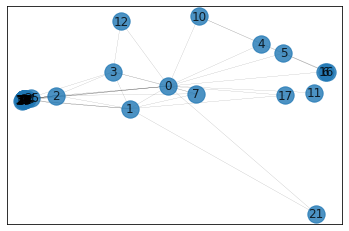

Num nodes: 34, num edges: 77
SVD error (low rank): 0.053622
hope_gsvd:
	Training time: 0.010363
	MAP: 0.11624245565569587 	 preccision curve: [1.0, 1.0, 0.6666666666666666, 0.5, 0.4]



----------------------------------------------------------------------------------------------------
Embedding dimension greater than 2, use tSNE to reduce it to 2


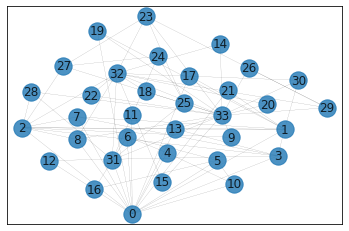

Num nodes: 34, num edges: 77
Laplacian matrix recon. error (low rank): 6.293280
lap_eigmap_svd:
	Training time: 0.012866
	MAP: 0.420547084646048 	 preccision curve: [0.0, 0.0, 0.0, 0.25, 0.2]



----------------------------------------------------------------------------------------------------


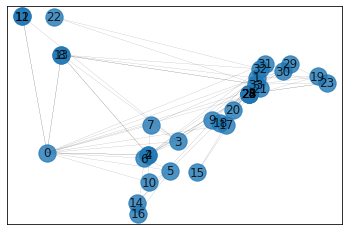

Num nodes: 34, num edges: 77
lle_svd:
	Training time: 0.011724
	MAP: 0.4525345405438006 	 preccision curve: [0.0, 0.0, 0.0, 0.25, 0.2]



----------------------------------------------------------------------------------------------------


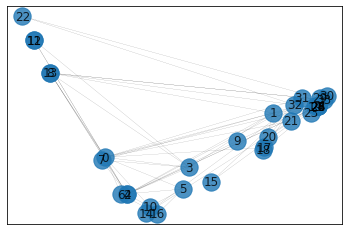

Num nodes: 34, num edges: 77


/content/GEM/gem/embedding/sdne_utils.py:71: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="relu", kernel_regularizer=<keras.reg...)`
  W_regularizer=Reg.l1_l2(l1=nu1, l2=nu2))(y[i])
/content/GEM/gem/embedding/sdne_utils.py:71: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_regularizer=<keras.reg...)`
  W_regularizer=Reg.l1_l2(l1=nu1, l2=nu2))(y[i])
/content/GEM/gem/embedding/sdne_utils.py:73: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="relu", kernel_regularizer=<keras.reg...)`
  W_regularizer=Reg.l1_l2(l1=nu1, l2=nu2))(y[K - 1])
/content/GEM/gem/embedding/sdne_utils.py:75: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  encoder = Model(input=x, output=y[K])
/content/GEM/gem/embedding/sdne_utils.py:90: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_regularize

Epoch 1/50
1/1 [==============================] - 0s - loss: 12.1330 - merge_7_loss: 6.0581 - merge_8_loss: 6.0708 - merge_9_loss: 0.0682
Epoch 2/50
1/1 [==============================] - 0s - loss: 10.9185 - merge_7_loss: 5.4773 - merge_8_loss: 5.4371 - merge_9_loss: 0.0870
Epoch 3/50
1/1 [==============================] - 0s - loss: 8.8308 - merge_7_loss: 4.3549 - merge_8_loss: 4.4718 - merge_9_loss: 0.1013
Epoch 4/50
1/1 [==============================] - 0s - loss: 7.9360 - merge_7_loss: 3.9711 - merge_8_loss: 3.9607 - merge_9_loss: 0.1523
Epoch 5/50
1/1 [==============================] - 0s - loss: 8.0556 - merge_7_loss: 4.0007 - merge_8_loss: 4.0508 - merge_9_loss: 0.1761
Epoch 6/50
1/1 [==============================] - 0s - loss: 8.1064 - merge_7_loss: 4.0821 - merge_8_loss: 4.0202 - merge_9_loss: 0.1653
Epoch 7/50
1/1 [==============================] - 0s - loss: 7.5945 - merge_7_loss: 3.7810 - merge_8_loss: 3.8094 - merge_9_loss: 0.1847
Epoch 8/50
1/1 [=======================

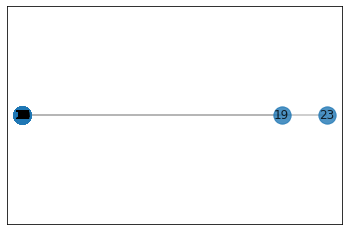

In [ ]:
'''
Run the graph embedding methods on Karate graph and evaluate them on 
graph reconstruction and visualization. Please copy the 
gem/data/karate.edgelist to the working directory
'''
import matplotlib.pyplot as plt
from time import time

from gem.utils      import graph_util, plot_util
from gem.evaluation import visualize_embedding as viz
from gem.evaluation import evaluate_graph_reconstruction as gr

from gem.embedding.gf       import GraphFactorization
from gem.embedding.hope     import HOPE
from gem.embedding.lap      import LaplacianEigenmaps
from gem.embedding.lle      import LocallyLinearEmbedding
from gem.embedding.node2vec import node2vec
from gem.embedding.sdne     import SDNE
from argparse import ArgumentParser


if __name__ == '__main__':
    ''' Sample usage
    python run_karate.py -node2vec 1
    '''
    parser = ArgumentParser(description='Graph Embedding Experiments on Karate Graph')
    parser.add_argument('-node2vec', '--node2vec',
                        help='whether to run node2vec (default: False)')
    args = vars(parser.parse_args(args={}))
    try:
        run_n2v = bool(int(args["node2vec"]))
    except:
        run_n2v = False

    # File that contains the edges. Format: source target
    # Optionally, you can add weights as third column: source target weight
    edge_f = 'karate.edgelist'
    # Specify whether the edges are directed
    isDirected = True

    # Load graph
    G = graph_util.loadGraphFromEdgeListTxt(edge_f, directed=isDirected)
    G = G.to_directed()

    models = []
    # Load the models you want to run
    models.append(GraphFactorization(d=2, max_iter=50000, eta=1 * 10**-4, regu=1.0, data_set='karate'))
    models.append(HOPE(d=4, beta=0.01))
    models.append(LaplacianEigenmaps(d=2))
    models.append(LocallyLinearEmbedding(d=2))
    if run_n2v:
        models.append(
            node2vec(d=2, max_iter=1, walk_len=80, num_walks=10, con_size=10, ret_p=1, inout_p=1)
        )
    models.append(SDNE(d=2, beta=5, alpha=1e-5, nu1=1e-6, nu2=1e-6, K=3,n_units=[50, 15,], rho=0.3, n_iter=50, xeta=0.01,n_batch=100,
                    modelfile=['enc_model.json', 'dec_model.json'],
                    weightfile=['enc_weights.hdf5', 'dec_weights.hdf5']))

    # For each model, learn the embedding and evaluate on graph reconstruction and visualization
    for embedding in models:
        print ('Num nodes: %d, num edges: %d' % (G.number_of_nodes(), G.number_of_edges()))
        t1 = time()
        # Learn embedding - accepts a networkx graph or file with edge list
        Y, t = embedding.learn_embedding(graph=G, edge_f=None, is_weighted=True, no_python=True)
        print (embedding._method_name+':\n\tTraining time: %f' % (time() - t1))
        # Evaluate on graph reconstruction
        MAP, prec_curv, err, err_baseline = gr.evaluateStaticGraphReconstruction(G, embedding, Y, None)
        #---------------------------------------------------------------------------------
        print(("\tMAP: {} \t preccision curve: {}\n\n\n\n"+'-'*100).format(MAP,prec_curv[:5]))
        #---------------------------------------------------------------------------------
        # Visualize
        viz.plot_embedding2D(embedding.get_embedding(), di_graph=G, node_colors=None)
        plt.show()

In [ ]:
!wget -q --show-progress https://github.com/palash1992/GEM/raw/master/examples/data/sbm_node_labels.pickle
!wget -q --show-progress https://github.com/palash1992/GEM/raw/master/examples/data/sbm.gpickle

sbm_node_labels.pic 100%[===================>]  60.36K  --.-KB/s    in 0.007s  
sbm.gpickle         100%[===================>]   1.17M  --.-KB/s    in 0.04s   
